# 5. Support Vector Machines

**CS229/Notes**

## 5.1 Decision Boundary / Separating Hyperplane

**回忆Logistics Regression**

logistics的拟合函数是：$h_\theta(x) = g(\theta^Tx)$.

若以正常的阈值$p=0.5$作为分界来看，$\theta^Tx>0$与否便构成了一个决策边界，或称separating hyperplane. 数据点距离该决策平面越远，则判断其属于某一类别的confidence越高.

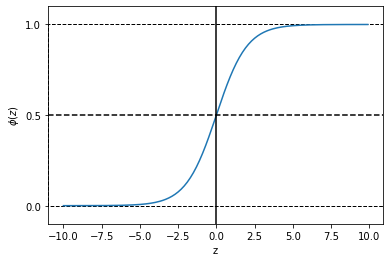

In [2]:
# 绘制sigmoid函数图像
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # 在x=0处画一条垂直的线
plt.axhspan(0.0, 1.0, facecolor='1.0', edgecolor='k', ls='dashed') # 在y=0和y=1处画一条水平的虚线
plt.axhline(y=0.5, ls='dashed', color='k') # 在y=0.5处画一条水平的虚线
plt.yticks([0.0, 0.5, 1.0]) # 设置y轴的刻度
plt.ylim(-0.1, 1.1) # 设置y轴的范围
plt.xlabel('z')
plt.ylabel('sigmoid (z)')
plt.show()

## 5.2 Some Notations

在本小节，我们将主要讨论一个**二元分类问题**，采用**linear classifier**. 

记标签为$y\in \{-1,1\}$，相关特征为$x$，模型参数为$\omega, \beta$，构建的拟合模型为:
$$ h_{\omega, b}(x) = g(\omega^Tx + b)$$
其中$g(z) = \text{sign}(z)$，即$g(z) = 1$ if $z\geq 0$，$g(z) = -1$ if $z<0$.

## 5.3 Functional & Geometic Margins

### a. Functional Margin $\gamma$

#### Functional Margin 作用 ：

度量预测的*正确性*与*置信度*。具体而言，Func Margin为正说明预测正确，其绝对值越大说明预测越置信。

> 注：其实由下面的构造形式可知，正的Func Margin意味着$y^{(i)}$和$\omega^Tx^{(i)}$同号，即预测正确。

#### Functional Margin 定义公式：
  
  $$\hat{\gamma}^{(i)} = y^{(i)}(\omega^Tx^{(i)} + b)$$

#### Functional Margin 存在的问题

缺少normalization。同倍改变$\omega$和$b$，Func Margin会变大，但并不会改变实际的决策边界提高预测效果。

#### 训练集的Functional Margin

给定训练集$S = \{(x^{(i)}, y^{(i)}); i = 1, ..., m\}$，则训练集的Func Margin（记为$\hat\gamma$）为所有样本的Func Margin的最小值，即

$$\hat\gamma = \min_{i=1, ..., m} \hat\gamma^{(i)}$$



### b. Geometric Margin $\hat\gamma$

现给出如图所示的决策边界$\omega^Tx+b=0$：

![](https://michael-1313341240.cos.ap-shanghai.myqcloud.com/202308131632970.png)

在上图中，我们可以给出如下事实陈述：

- 由解析几何知识可知，向量$\omega$定与超平面$\omega^Tx+b=0$垂直（正交），即$\omega$是超平面的法向量
- 记$A$为$y^{(i)}=1$的一样本点（其坐标可表示为向量$x^{(i)}$），则A到决策边界的距离为垂线段$AB$，记之为$\gamma^{(i)}$.

**下面具体求解$\gamma^{(i)}$**

求解思路：我们已知 *(1) AB垂直于超平面; (2) B位于超平面$\omega^Txb=0$上; (3)$\omega$是超平面的一个法向量*。 因此我们可以求解B的坐标，通过 **B落在超平面上** 这一事实构造等式求解方程。

具体而言，B的坐标等于*A的坐标沿着法向量方向回退$\gamma^{(i)}$个长度的距离*，因此我们有：
$$ \omega^T(x^{(i)}-\gamma^{(i)}\frac{\omega}{||\omega||})+b=0$$

通过求解上述方程，即可求得：
$$
\gamma^{(i)}=\frac{w^T x^{(i)}+b}{\|w\|}=\left(\frac{w}{\|w\|}\right)^T x^{(i)}+\frac{b}{\|w\|}
$$

更一般地，考虑到正负样本的不同，更一般的公式为：
$$ \gamma^{(i)}=y^{(i)}\left(\left(\frac{w}{\|w\|}\right)^T x^{(i)}+\frac{b}{\|w\|}\right)$$


**说明：**
1. 当$||\omega|| =1$时，Geometric Margin 等价于 Functional Margin
2. 由于进行了正则化，Geo Margin杜绝了Func Margin存在的缩放问题

同理，定义训练集（$S = \{(x^{(i)}, y^{(i)}); i = 1, \dots, m\}$）的geometric margin：
$$\gamma = \min_{i=1,\dots,m} \hat{\gamma}^{(i)}$$



## 5.4 Optimal Margin Classifier

朴素地，我们希望得到的分割平面尽可能使得上文的margin $\gamma$足够大，下面就是要量化这一想法。

在本节的讨论中，我们都假设数据集是**线性可分的（linearly separable）**，即存在一些超平面可以将正负样本完全分开。

### 朴素的优化问题

上述的想法可以概括为如下优化问题：

$$ \begin{align*} \max_{\gamma, \omega, b} \quad &\gamma \\
\text{s.t. } \quad &y^{(i)}(\omega^Tx^{(i)} + b) \geq \gamma, \quad i = 1, \ldots, m \\ 
&||\omega|| = 1 \end{align*} $$

即，希望能够最大化$\gamma$，同时满足所有的训练样本的*func. margin*都至少为$\gamma$。同时参见5.3的讨论可知，$||\omega|| = 1$使得* geo. margin *等价于* func. margin*。

然而上述内容是***非凸优化*** 的，因此下给出一个等价的凸优化问题。

### 改进的优化问题

归根到底我们希望得到的是Geo Margin最大的分类器，因此通过下列方式去掉非凸部分$||\omega||=1$：

$$ \begin{align*} \max_{\hat\gamma, \omega, b} \quad &\frac{\hat\gamma}{||\omega||} \\
\text{s.t. } \quad &y^{(i)}(\omega^Tx^{(i)} + b) \geq \hat\gamma, \quad i = 1, \ldots, m \end{align*} $$

然而这里的目标函数$\frac{\hat\gamma}{||\omega||}$依然是非凸的(sad)

### 最终的凸优化问题

最终我们得到的凸优化问题如下所示（这里我们先给出具体形式再解释其原理）：
$$
\begin{align}
\min_{\gamma,\omega,b} \quad & \frac{1}{2}||\omega||^2 \\
\text{s.t.} \quad & y^{(i)}(\omega^Tx^{(i)}+b) \geq 1, \quad i=1,\cdots,m
\end{align}
$$

- 首先我们可以规定$\hat\gamma = 1$，则原始优化问题可以转化为$\max \{1/||\omega||\}$

    这是因为正如前文在介绍func. margin时所说，我们可以通过任意成倍地更改$\omega, b$的值来改变func. margin的值，而这不会影响到我们的最优化问题的解。

- 其次，我们可以将$\max \{1/||\omega||\}$转化为$\min \{||\omega||^2\}$，这是显然的

通过上述变换最终得到的优化问题是凸优化可解的。这里的优化解即为**optimal margin classifier**.

## 5.5 Lagrange Duality 拉格朗日对偶

[bilibili: “拉格朗日对偶问题”如何直观理解？“KKT条件” “Slater条件” “凸优化”打包理解](https://www.bilibili.com/video/BV1HP4y1Y79e/?share_source=copy_web&vd_source=9471c7cd3fca9ffedd9167aefed57c6d)

### Intro: Lagrange Multiplier

考虑如下形式的优化问题：
$$\begin{aligned}
\min_{w} &\quad f(w) \\
\text{s.t.} &\quad h_i(w) = 0, \quad i = 1, \ldots, l 
\end{aligned}$$

上述的优化问题可以通过**拉格朗日乘子法**来求解。


具体地，我们可以得到*Lagarangian*：
$$ \mathcal{L(w,\beta)}= f(w) + \sum_{i=1}^l \beta_i h_i (w)$$
其中一系列引入的参数$\beta_i$称为拉格朗日乘子 *(Lagrange multipliers)* .

通过求解下列方程组求解Lagrange Mult.：
$$ \partial\mathcal{L}/\partial w = 0; \quad \partial\mathcal{L}/\partial \beta_i = 0$$

### Primal Optimization Problem

这里我们需要把上面的Lagrange Mult进行推广，考虑**约束条件中存在不等式**的情况（我们称这种优化问题为 ***primal optimization problem（原始问题）*** 。用数学语言表示为：
$$ \begin{align}
\min_{w} \quad & f(w) \\
\text{s.t.} \quad & g_i(w) \leq 0, \quad i = 1, \cdots, k
\\& h_i(w) = 0, \quad i = 1, \cdots, l
\end{align} $$

$\diamond$

因此引入***Generalized Lagrangian***，即
$$
\mathcal{L}(w,\alpha,\beta) = f(w) + \sum_{i=1}^k \alpha_i g_i(w) + \sum_{i=1}^l\beta_i h_i(w)
$$

其中$\alpha_i$和$\beta_i$是拉格朗日乘子.

$\diamond$

**另外定义$\theta_{\mathcal{P}}$** *(primal)*
$$ \theta_{\mathcal{P}}(w) = \max_{\alpha,\beta \textit{ s.t. } \alpha_i\ge 0} \mathcal{L(w,\alpha,\beta)} \quad\dagger$$


可以证明,当存在违反约束（式(2)/(3)）中的条件时，$\theta_{\mathcal{P}} \to \infty$ （即令 $\mathcal{L}$ 中违反条件的项前的系数$\alpha / \beta \to \infty$即可）；相反地，若全部满足约束，则$\theta_{\mathcal{P}} = f(w)$，即：
$$
\theta_{\mathcal{P}}(w)= \begin{cases}f(w) & \text { if } w \text { satisfies primal constraints } \\ \infty & \text { otherwise. }\end{cases}
$$

$\diamond$

因此，通过$\theta_{\mathcal{P}}$，我们就可以将*primal problem*的（1）～（3）式加以概括。

式（1）描述的问题是：$\min_{w}f(w)$，在满足约束时，就等价于$\min_w\theta_{\mathcal{P}}(w,b)$，再代入式$(\dagger)$有：
$$\min_w\theta_{\mathcal{P}}(w,b)=\min_w\max_{\alpha,\beta: \alpha_i\geq0} \mathcal{L}(w,\alpha,\beta)\quad \star$$

而这一优化问题与primal problem是完全等价的，且具有相同的解。为方便起见，我们记$p^* := \min_w\theta_{\mathcal{P}}(w)$，称$p^*$为 ***primal optimal value***。

$\diamond$

### Dual Optimization Problem

> **理解：** 对偶是实质相同但从不同角度提出不同提法的一对问题。有时候原问题 (Primal Problem) 不太好解，但是对偶问题 (Dual Problem) 却很好解，我们就可以通过求解对偶问题来迂回地解答原问题。

类似地**定义Lagrange 对偶函数$\theta_{\mathcal{D}}$** *(dual)*：
$$\theta_{\mathcal{D}}(\alpha,\beta) = \min_{w} \mathcal{L}(w,\alpha,\beta) ,\alpha\ge0    \quad \dagger^2$$ 

*注意，$\theta_{\mathcal{D}}$和$\theta_{\mathcal{P}}$的区别在于：$\theta_{\mathcal{D}}$是关于$\alpha$和$\beta$的优化函数，而$\theta_{\mathcal{P}}$是关于$w$的优化函数。*

另外可以证明，无论原问题函数$\theta_{\mathcal{P}}$的凹凸性，恒有对偶函数$\theta_{\mathcal{D}}$是一个凹函数.

> 凹函数：$ f(\theta x_1 + (1-\theta)x_2) \ge \theta f(x_1) + (1-\theta)f(x_2) $

$\diamond$

顺势，我们引入***dual optimization problem***:
$$ \max \limits_{\alpha,\beta:\alpha_i\ge0} \theta_{\mathcal{D}}(\alpha,\beta) = \max\limits_{\alpha,\beta:\alpha_i\ge0} \min_w \mathcal{L}(w,\alpha,\beta) \quad \star\star$$

并同理记之为$d^*$。

注意到，$p^*$与$d^*$的唯一区别是二者$\min,\max$的顺序不同。


$\diamond$

### 强、弱对偶条件

#### a. 弱对偶

在任何条件下，可以证明下列不等关系是恒成立的：
$$d^* = \max_{\alpha,\beta:\alpha_i\ge0} \min_w L(w,\alpha,\beta) \le \min_w \max_{\alpha,\beta:\alpha_i\ge0} L(w,\alpha,\beta) = p^*$$

记$p^*-d^*$为duality gap.

#### b. 强对偶

而在一些*特定条件*下，该不等式取等，即
$$d^* = p^*$$
在这些条件下，我们就可以通过求解对偶问题来求解原始问题。

##### b-1 强对偶条件（1）: Slater's condition （充要条件）

- $f, g_i$是凸函数
- $h_i$是仿射函数
  - 仿射函数: $h_i(w) = a_i^Tw + b_i$
- $g_i$是strictly feasible的
  - strictly feasible: $\exist w, \textit{ s.t. } \forall i, g_i(w) < 0$

此时，则$\exist w^*, \alpha^*, \beta^*$，使得 $w^*$是primal problem的解，$\alpha^*, \beta^*$是dual problem的解，且$p^* = d^*=\mathcal{L}(w^*,\alpha^*,\beta^*)$。

##### b-2 强对偶条件（2）: KKT条件（充要条件）必要条件

此外，还有KKT条件，即
$$
\begin{align}
\frac{\partial}{\partial w_i} \mathcal{L}\left(w^*, \alpha^*, \beta^*\right) & =0, \quad i=1, \ldots, n \\
\frac{\partial}{\partial \beta_i} \mathcal{L}\left(w^*, \alpha^*, \beta^*\right) & =0, \quad i=1, \ldots, l \\
\alpha_i^* g_i\left(w^*\right) & =0, \quad i=1, \ldots, k \\
g_i\left(w^*\right) & \leq 0, \quad i=1, \ldots, k \\
\alpha^* & \geq 0, \quad i=1, \ldots, k
\end{align}
$$

其中，称等式（3）为***dual complementarity***条件，其含义为：若$\alpha_i^*>0$，则$g_i(w^*)=0$. 

通过后面的描述可见，SVM只需要少量的*support vectors*.

## 5.6 Optimal Margin Classifiers

回忆，在*Optimal Margin Classifiers*中，我们考虑如下优化问题：

$$\begin{aligned}
\min_{\gamma, w, b} \quad & \frac{1}{2} \|w\|^2 \\
\text{s.t.} \quad & g_i(w) = -y^{(i)}(w^Tx^{(i)} + b) + 1 \leq 0, \quad i = 1, \ldots, m
\end{aligned}$$

由上文KKT条件中的 *(3)dual complementarity* 条件可知，只有那些满足 $g_i(w) = 0$ 的样本才会对最优解有贡献（贡献体现在$a_i>0$）。而这里的 $g_i(w)=-y^{(i)}(w^Tx^{(i)} + b) + 1$表示恰好落在margin上的样本，即支持向量。

具体参见下图：

![](https://michael-1313341240.cos.ap-shanghai.myqcloud.com/202308151603962.png)

图中实线表示的是决策边界，虚线表示的是margin。我们可以看到，只有在虚线上的一个x和两个o样本是对边际有贡献的，称为***support vectors***

$\diamond$

我们由此往下，尝试通过对偶问题解决原问题。

首先引入向量内积符号：$ \langle x, y \rangle = x^T y $

我们目前需要解决的optimal margin classifier的优化问题是：
$$ \begin{align*}
\mathcal{L}(w,b,\alpha) = \frac12 ||w||^2 - \sum_{i=1}^m \alpha_i \left( y^{(i)} (w^T x^{(i)} + b) - 1 \right)
\end{align*} \quad [\dagger] $$

回忆：
$$\theta_{\mathcal{D}}(\alpha,\beta) = \min_{w} \mathcal{L}(w,\alpha,\beta) ,\alpha\ge0 $$ 

因此我们分别对$w$和$b$求偏导，令其为0，得到：
$$ \begin{align}
\nabla_w \mathcal{L}(w,b,\alpha) &= w - \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)} = 0 \\
\nabla_b \mathcal{L}(w,b,\alpha) &= \sum_{i=1}^m \alpha_i y^{(i)} = 0
\end{align} $$

由(1) 解得：
$$w = \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)} \quad [\ast]$$

直观的理解，这里的含义是指参数$w$一定是原始的训练集的线性组合。一个直觉的理解可以回忆线性回归中$\hat\beta = (X^T X)^{-1} X^T y$

将这里的$w$代入$[\dagger]$并化简，得到
$$\begin{align*}
\mathcal{L}(w,b,\alpha) &= \sum_{i=1}^m \alpha_i - \frac12 \sum_{i,j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} \langle x^{(i)}, x^{(j)} \rangle - b\sum_{i=1}^m \alpha_i y^{(i)} \\ 
&= \sum_{i=1}^m \alpha_i - \frac12 \sum_{i,j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} \langle x^{(i)}, x^{(j)} \rangle  \textit{ (by eqn. (2)) } \\
\end{align*}$$


最终可以得到如下的对偶问题 **(Dual Optimizatoin Problem of SVM)**：

$$\begin{align*}
\max_{\alpha} \quad & W(\alpha) = \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle \\
\text{s.t.} \quad & \alpha_i \geq 0, \quad i = 1, \ldots, m \\
& \sum_{i=1}^m \alpha_i y^{(i)} = 0
\end{align*}$$

可验证，本对偶问题符合KKT条件。

**预测过程**
1. 求解 $a_i, b$
2. 预测$h_{w,b}(x)=g(w^Tx+b) = g((\sum_i a_i y^{(i)} x^{(i)})^Tx+b)=g(\sum_i\alpha_iy^{(i)}\langle x^{(i)},x\rangle+b)$

## 5.7 Kernels 核方法

### Kernel Methods 思路

**(1) 将算法写作含$\langle x^{(i)},x^{(j)}\rangle \textit{( or note as } \langle x,z\rangle \textit{) }$的形式**

**(2) 映射 $x_\textit{ (low dim)} \rightarrow \phi(x) _\textit{ (high dim)}$**

**(3) 寻找容易可行的计算$K(x,z) = \phi(x)^T\phi(z)$的方法**

**(4) 讲上述算法中的$\langle x,z\rangle$替换为$K(x,z)$**

### 例子

假设$x,z\in\mathbb{R}^n$

在本例中，假设有三个特征$x_1,...,x_3$，以及映射函数：
$$ \phi(x) = [x_1x_1, x_1x_2,x_1x_3,...,x_3x_3]^T $$
需要指出，正常直接计算$\phi(x)$ （或$\phi(x)^T\phi(z)$）需要$O(n^2)$的时间

$\diamond$

为化简计算，考虑如下核方法：
$$ K(x,z) = \phi(x)^T\phi(z) =^{?} (x^Tz)^2 = ... = \sum_{i,j=1}^n (x_ix_j)(z_iz_j) $$
这个核方法的计算复杂度为$O(n)$

可以通过单纯的代数运算证明，[?]处等式在给定映射关系$\phi$后是可以直接推出的。

$\diamond$




再考虑另外一种核方法：

$$\begin{align*}
K(x,z) &= (x^Tz+c)^2\\
&= \sum \limits_{i,j=1}^n (x_ix_j)(z_i z_j) + \sum \limits_{i=1}^n (\sqrt{2c}x_i)(\sqrt{2c}z_i) + c^2
\end{align*}$$

# 5* SVM & Kernel Methods 

**现代数字信号处理_张颢 / 笔记**

## 5.1 Support Vector Machine (Vapnik, 1960's)

### 5.1.1 SVM 处理的问题

SVM主要用于处理*分类任务*. 

具体地，我们有如下训练集：$(x_1,y_1),..., (x_n,y_n)$, 希望能够构造一个函数$f(\cdot)$，*s.t.* 
$$f(x_i)=y_i,\\~\textit{  where  } i=1,2,...,n, ~ x_i\in \mathbb{R}^n, ~ y_i\in \{-1,1\} $$

$\diamond$ 

进一步，为了模型的简便性，我们希望构造的函数是线性的，或至少是仿射的 *(Affine)*，即
$$f(x) = w^Tx + b$$

可以认为上述$f(x)$构造了一个超平面 *(Hyperplane)* ，由解析几何知识可知，$w$是超平面的法向量，$b$是超平面的截距。

$\diamond$

### 5.1.2 SVM 的朴素优化目标

**首先定义点$x$到平面的距离$d(x,f)$**

$$d(x,f) = \frac{1}{\|w\|} |w^Tx + b|$$

> $\dagger\text{ Proof.}$
> 
> 已知$w$是平面上的法向量，$x$是平面上的一点，$x_0$是$x$向平面做垂线的垂足，则有
> $$x-x_0 \perp f \Rightarrow x-x_0 \mathop{//} w$$
>
> 故
> 
> $$|w^T(x-x_0)| =|w^Tx-W^Tx_0|\\ = |w^Tx + b| = ||w||\cdot \underbrace{||x-x_0||}_{d(x,f)}$$
> 命题由上式最后一个等号变形即证
> 
> $\square$

**再定义点集$A$到超平面的距离$d(A,f)$**
$$ d(A,f) = \min_{x\in A} d(x,f) $$

将这个距离称为***Margin***

$\diamond$

**下开始推导SVM的优化目标**

在给出上述定义后，我们给出理想超平面的分类准则，即 *希望得到的超平面对任意类别的集合的距离最大*：

$$\begin{aligned}
\max_{w,b}\left ( \frac{w^Tx^{(A)}+b}{||w||} + \frac{w^Tx^{(B)}+b}{||w||} \right ) \quad\quad(1)
\end{aligned}
$$

由对称性，我们有$|w^Tx^{(A)}+b| = |w^Tx^{(B)}+b| := a $，故上(1)式可化为：
$$
\begin{aligned}
\max_{w,b}\left( \frac{2a}{||w||} \right) \quad\quad(2)
\end{aligned}
$$

观察上式，会发现$a$对于超平面的优化是没有影响的；换言之，我们可以通过坐标变换，在不改变超平面的法向量$w$和截距$b$的情况下，改变$a$的值。

因此，我们可以不妨**令$a$归一化为1**. 此时上式变为：
$$
\begin{aligned}
\max_{w,b}\left( \frac{2}{||w||} \right) \Leftrightarrow \min_{w,b}{||w||}  \quad\quad(3)
\end{aligned}
$$

$\diamond$


但是我们还需要在优化问题中指示分类的正误与否。具体而言，对于Margin上的两个点$x^{(1)}$和$x^{(-1)}$，我们希望它们被正确分类，即：
$$
\begin{aligned}
\begin{cases}
w^Tx^{(1)}+b = 1 \\
w^Tx^{(-1)}+b = -1
\end{cases}
\end{aligned}
$$

考虑到，Margin上的点已经是该类别的点中的最小值，则其余点的距离都将大于1. 由此整合，可以得到**正确分类时的条件**：

$$ \begin{aligned}
(w^Tx_i+b)y_i \ge 1 \quad\quad (4)
\end{aligned}
$$

$\diamond$

结合（3）（4）两式，最终得到**正式的（朴素的）分类优化目标**：

$$
\begin{aligned}
\min_{w,b} \quad & ||w|| \\
\textit{s.t.} \quad & y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \ldots, n
\end{aligned}
$$

$\diamond$

### 5.1.3 SVM 优化目标的数学推导

为了方便，继续对上述优化目标进行变形.

首先该优化目标等价于：
$$
\begin{aligned}
\min_{w,b} \quad & \frac12 ||w||^2 \\
\textit{s.t.} \quad & y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \ldots, n
\end{aligned}
$$

$\diamond$

为解决这一优化问题，引入***Lagrange Multiplier***，希望优化目标Lagrange函数为：
$$
\begin{aligned}
L^*(w,b,\boldsymbol{\lambda}) = \frac{1}{2}||w||^2 + \sum_{i=1}^m {\lambda}_i \underbrace{\left [- y^{(i)}(w^Tx^{(i)}+b)+ 1\right ]}_{\textit{Penalty}} \quad \ast
\end{aligned}
$$
其中，记$\boldsymbol{\lambda} = [\lambda_1, \lambda_2, \cdots, \lambda_m]^T$. 此外，注意式中*Penalty*项中的符号方向.

$\diamond$


但是$*$中的优化函数存在问题：

- 考虑数据集中远离超平面的数据点，会发现这些点会使得*Penalty*项很负，从而极大地影响了优化的结果
- 然而，事实上超平面的位置并不应该被这些临近点所影响
- ideally，我们只需要优化函数指示分类是否是大于1的即可，对于大于1的case（即不在margin上的点），我们并不关心它们的具体位置。

因此得到修改后的**最终的Lagrange优化函数：**

$$
\begin{aligned}
L(w,b,\boldsymbol{\lambda}) &= \frac{1}{2}||w||^2 + \sum_{i=1}^n \lambda_i \cdot \underbrace{\mathcal{Hinge}\left [ 1 - y^{(i)}(w^Tx^{(i)} + b)\right]  }_{\textit{Nonlinear}}\\
\end{aligned}
$$

其中引入截断函数:
$$ \mathcal{Hinge}(z) = \max(0, z) $$


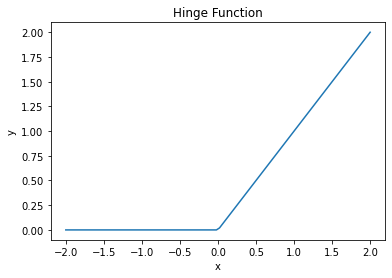

In [3]:
# Hinge Function Plot
import numpy as np
import matplotlib.pyplot as plt 
x = np.linspace(-2, 2, 100)
y = np.maximum(0, x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hinge Function')
plt.show()

### 5.1.4 SVM 优化目标的高级凸优化处理变形

#### 处理1：Squeezing / Relaxing （去除非线性部分）

首先，继续整理上述优化内容，得到：

$$
\begin{aligned}
 [\dagger^1]:\quad 
\min_{w,b,z} \quad & \frac{1}{2} ||w||^2 + \sum_{i=1}^n z_i \\
\textit{s.t.} \quad &  z_i \geq 1 - y^{(i)} (w^T x^{(i)} + b), \quad i = 1, \ldots, n \quad\quad \\
& z_i \geq 0, \quad i = 1, \ldots, n
\end{aligned}
$$

下给出两个*intuition*试图对上述内容进行直观上的解释.

##### \# Intuition 1 - *Squeezing*

- 上述优化内容中，$\frac12||w||^2$表示对是需要优化的margin，后面$\sum z_i$是penalty.

- 由于$\sum z_i$ 的加入，我们在优化中我们希望这一项尽可能的小（但至少要大于等于0）
  - 而我们又可以近似将$z_i$看作是$1-y_i(w^Tx_i+b)$的*inf*
  - 因此在不断缩小$z_i$的同时，我们就在不断缩小 *(squeezing)*  $1-y_iw^Tx_i$，也就是在不断增大margin

##### \# Intuition 2 - *Relaxing*

首先有下列事实：

$$\begin{aligned}
& z_i \ge 1-y_i\cdot (w^Tx_i+b) \ge 0 
\\ \Leftrightarrow ~& \quad y_i\cdot(w^Tx_i+b) \ge 1-z_i
\end{aligned}
$$

而这一事实可以理解为：

- 我们可以放宽原先的 $y_i(w^Tx_i+b) \ge 1$ 约束，允许一些误分类的点存在；即将原约束放宽为：$ y_i(w^Tx_i+b) \ge 1-z_i$，其中 $z_i \ge 0$
- 接着我们希望误分类的情况尽可能少的出现，即最小化 $\sum_{i=1}^m z_i$


> ***Squeezing* 和 *Relaxing* 都是在优化中常见的处理非线性等复杂情况等手段。**

#### 处理2：Lagrange Duality

##### Lagrange Duality的一般原理

一般地，有下列约束问题：

$$\begin{aligned}
\min_{x} \quad & f_0(x) \\
\text{s.t.} \quad & g_i(x) \leq 0, \quad i = 1, \ldots, n \\
& h_i(x) = 0, \quad i = 1, \ldots, m
\end{aligned}$$

得到对应的拉格朗日函数：

$$ \begin{aligned}
L(x, \lambda, \mu) &= f_0(x) + \sum_{i=1}^n \lambda_i g_i(x) + \sum_{i=1}^m \mu_i h_i(x) 
\end{aligned}
$$

$\diamond$


为了解决上述优化问题，可以将Lagrange函数处理成Inner和Outer两个优化问题：

***Inner Optimization Problem ( 对$L$关于$x$进行优化 )***:

$$x^*_{\lambda,\mu} = \arg\min_{x\in D} L(x,\lambda,\mu)$$

***Outer Optimization Problem ( 对$L$关于$\lambda,\mu$进行优化 )***:

代入上面已经得到的最优化$x^*$,进行优化有

$$\lambda^*,\mu^* = \arg\max_{\lambda,\mu} L(x^*_{\lambda,\mu},\lambda,\mu)$$

**这是一个*Minimax*的策略**，下对其合理性给出理解：

> $\dagger \text{ Explanation.}$
> 
> 首先当$x\in D$即处于可行域中时，我们一定恒有
> $$f_0(x)\ge f_0(x) +\underbrace{  \sum \lambda_i g_i}_{g_i\le 0} + \underbrace{ \sum \mu_i h_i}_{h_i=0} \quad\quad \text{(1)}$$
>
> 而LHS就是我们的*Lagrange Function*，即$f_0(x)\ge L$，由此得到了$L$的一个*sup*.
>
> 由此我们推出，定有：
>
> $$f_0(x) \ge \min_{x\in D} L(x, \lambda, \mu) ,\quad \forall x\in D \quad\quad \text{(2)}$$
>
> 进一步，亦有：
>
> $$\min_{x\in D} f_0(x) \ge \min_{x\in D} L(x, \lambda, \mu) \quad\quad \text{(3)}$$
>
> 当控制住了$x$的取值时，再改变$\lambda,\mu$将不会再改变(3)中的符号方向，故有
>
> $$\min_{x\in D} f_0(x) \ge \max_{\lambda,\mu}\min_{x\in D} L(x, \lambda, \mu) \quad\quad \text{(4)}$$
>
> 而上式中对$\lambda,\mu$取$\max$的原因是，$f_0(x)$是我们的优化目标，在满足约束条件的前提下，我们希望最终优化的结果可以尽可能的接近$f_0(x)$.
>


$\diamond$




说明：
- 在满足一定条件下，(4)中的不等号将严格取等，即对于Lagrange Function的 Minimax策略最终完全逼近其*sup*
- 我们称该条件为***Slater's Condition***（具体条件内容略）
- 对于能够严格取等的情况，称之为*Strong Duality*，反之则为*Weak Duality*.

$\diamond$

进一步处理，首先恒有如下不等式（即全局最小值定不大于局部最小）：

$$f_0(x) \ge \min_{x\in D}L(x,\lambda,\mu) \ge \min_{x}L(x,\lambda,\mu) $$

代入到上述(3)(4)中，就可以将约束优化转化为无约束优化：
$$\min_{x\in D} f_0(x) \ge \min_{x} L(x, \lambda, \mu) \quad\quad \text{(3*)}
\\
\min_{x\in D} f_0(x) \ge \max_{\lambda,\mu}\min_{x} L(x, \lambda, \mu) \quad\quad \text{(4*)}
$$

可以证明，对于满足*Slater's Condition*的情况，等号依然可以严格取到。

##### 一个例子

考虑如下的优化问题：*寻找一个经过$x$的平面使得经过远点的距离是最小的，即*
$$\begin{aligned}
\min_{w,b} \quad & \frac12||w||^2 \\
\text{s.t.} \quad & w^Tx+b=0
\end{aligned}$$


> $\dagger$ **Solution**
>
> *构造Lagrange Function:*
>
> $$ L(w,b,\lambda) = \frac{1}{2}||w||^2 + \lambda(w^Tx+b)$$
> 
> *再构造对偶问题：*
>
> - *Inner Optimization*
>
> $$ \nabla_w L(w,b,\lambda) = w + \lambda x = 0 \\ \Rightarrow w^* = -\lambda x$$
> 
> - *Outer Optimization*
>  
> $$ L_{\omega^*}(\lambda) = -\frac12(x^Tx)\lambda^2+\lambda b \\ \Rightarrow \lambda^* = \arg\min_\lambda L_{\omega^*}(\lambda)  $$




**评价**

上例很好地体现了Lagrange Dual Problem的优势：其有效地将原问题转化为了Inner和Outer两个相对更好解决的问题：
- Inner Problem由前面的证明已知，是一个无约束问题
- Outer Problem 在代入Inner Problem之后得到了一个更为简单的优化问题。

##### Lagrange Duality 处理 SVM 的优化问题